<a href="https://colab.research.google.com/github/waseltzer/ATLAS_SoundLab/blob/main/Quantum_Computing_and_Music_Wayne_Seltzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Music Generation using Quantum Computing - Wayne Seltzer <wayne.seltzer@colorado.edu>
I'm interested in exploring music generated by quantum computing.
I've written some Python code to create musical notes in a specific scale, key, and rhythm pattern. I'm using Music21Links to an external site. to manage music data structures and operations, LilypondLinks to an external site. for displaying music notation, and FluidsynthLinks to an external site. for playing the music.

I'm working on a simple quantum circuit using superposition to generate the notes and rhythms.

I'm reading various published papers about quantum music generation to learn what others have done before.
Is it possible to for a quantum implementation to improve upon using a classical random number generator? Can we make the result more organic/musical?

Be sure to use Runtime ... Run All to view the results.

[Link to to "Final Results" cell.](#final-results) <br>
Run the cell to generate a new composition.<br>
Click the "play" button to play the music. (speakers on!)


# Uses:

*   **Music21:** http://web.mit.edu/music21/
> "Music21 is a set of tools for helping scholars and other active listeners answer questions about music quickly and simply."

*   **Fluidsynth:** https://www.fluidsynth.org/api/Introduction.html
> https://github.com/SpotlightKid/pyfluidsynth <p>
> Software synthesizer based on the SoundFont 2 specifications.

*   **Lilypond:** Music notation
> https://lilypond.org/introduction.html


Based on example python code: https://groups.google.com/g/music21list/c/wcUsuqvbpUQ

> Robby Nevels Sep 26, 2020, 10:01:56 PM to music21:

>I wanted to play around with music21 on notebooks in google colaboratory, but it took me an embarrassing amount of time to figure out how to see and hear notes with .show(). I finally got it working, so I thought I'd share what I did here in case others find it useful: https://colab.research.google.com/drive/17Fql7pyK3xsO8KmZorvb1tBoPomidCPB 







## Sources:

Scott Oshiro

* Oshiro, Scott, and Omar Costa Hamido. "A Quantum-Classical Network for Beat-Making Performance." Journal of Network Music and Arts 2, 1 (2020). https://commons.library.stonybrook.edu/jonma/vol2/iss1/4
https://scottoshiro.squarespace.com/quantum-computing-projectsLinks
* "Quantum Computer Music - Foundations, Methods and Advanced Concepts" Editors, Eduardo, Reck Miranda, https://doi.org/10.1007/978-3-031-13909-3

SQCMC 1st International Symposium on Quantum Computing and Musical CreativityNov 19-20, 2021
* https://iccmr-quantum.github.io/1st_isqcmc/

Inspiring ideas! Beyond my current knowledge of quantum computing and music theory.


# Load libraries, etc

In [100]:
# music21: render images of musical notes
print('installing lilypond...')
!apt-get install lilypond > /dev/null

# Fluidsynth: converts midi files to wav files into order to play them
print('installing fluidsynth...')
!apt-get install fluidsynth > /dev/null

print('done!')

installing lilypond...
installing fluidsynth...
done!


In [101]:
!ls /usr/share/sounds/sf2

default-GM.sf2	FluidR3_GM.sf2	TimGM6mb.sf2


In [102]:
# Soundfont file for Fluidsynth:
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2

In [103]:
!fluidsynth --version

FluidSynth runtime version 2.1.1
Copyright (C) 2000-2020 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

FluidSynth executable version 2.1.1
Sample type=double


In [104]:
!lilypond --version

GNU LilyPond 2.20.0

Copyright (c) 1996--2015 by
  Han-Wen Nienhuys <hanwen@xs4all.nl>
  Jan Nieuwenhuizen <janneke@gnu.org>
  and others.

This program is free software.  It is covered by the GNU General Public
License and you are welcome to change it and/or distribute copies of it
under certain conditions.  Invoke as `lilypond --warranty' for more
information.



In [105]:
import music21
music21.__version__

'8.1.0'

# Example
How to use music21, lily, and fluidsynth to create and play a musical score:

In [106]:
import music21
from IPython.display import Image, Audio

def show(music):
  display(Image(str(music.write('lily.png'))))

def play(music):
  filename = music.write('mid')
  !fluidsynth -ni font.sf2 $filename -F $filename\.wav -r 16000 > /dev/null
  # print(str(filename) + ".wav")
  display(Audio(str(filename) + '.wav'))

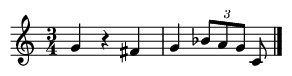

In [107]:
#littleMelody = music21.convertor.parse('tinynotation: 3/4 c4 d8 f g16 a g f#')
littleMelody = music21.converter.parse('tinyNotation: 3/4 g4 r f# g=lastG trip{b-8 a g} c')

show(littleMelody)
play(littleMelody)



#Exploring the minor pentatonic scale
https://pulse.berklee.edu/scales/a-minor-pentatonic-scale.html<br>
Notes: A C D E G

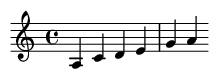

In [108]:

a_minor_pentatonic_scale = ['A3', 'C', 'D', 'E', 'G', 'A']
s = music21.stream.Stream()
for n in a_minor_pentatonic_scale :
    s.append(music21.note.Note(n))
#s.show('text')
show(s)
play(s)

#Generate a score using python random function
(not using quantum circuits yet...)

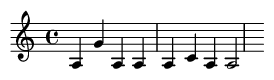

In [109]:
import random
a_minor_pentatonic_scale = ['A3', 'C', 'D', 'E', 'G', 'A']
scale = a_minor_pentatonic_scale
s = music21.stream.Stream()
s.append(music21.note.Note(scale[0])) #begin on root
for r in range (0,8-2) :
    n = random.randint(0, len(scale)-1)
    s.append(music21.note.Note(scale[n]))

#end on root
x = music21.note.Note("A3")
x.duration.type = 'half'
s.append(x) 

#s.show('text')
show(s)
play(s)

#Quantum note generation

In [110]:
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
!pip install qiskit ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit  #Importing the QuantumCircuit function from Qiskit. We will use this to create our quantum circuits!

# We will use these functions to run our circuit and visualize its final state
from qiskit import Aer, execute
from qiskit.visualization import *

import warnings  # We are using this library to suppress some warning messages
warnings.filterwarnings("ignore")

print("Libraries imported successfully!")

Libraries imported successfully!


#Quantum circuit to generate a note
Measure the qubits in superposition to get an integer that can be used to index the scale list.


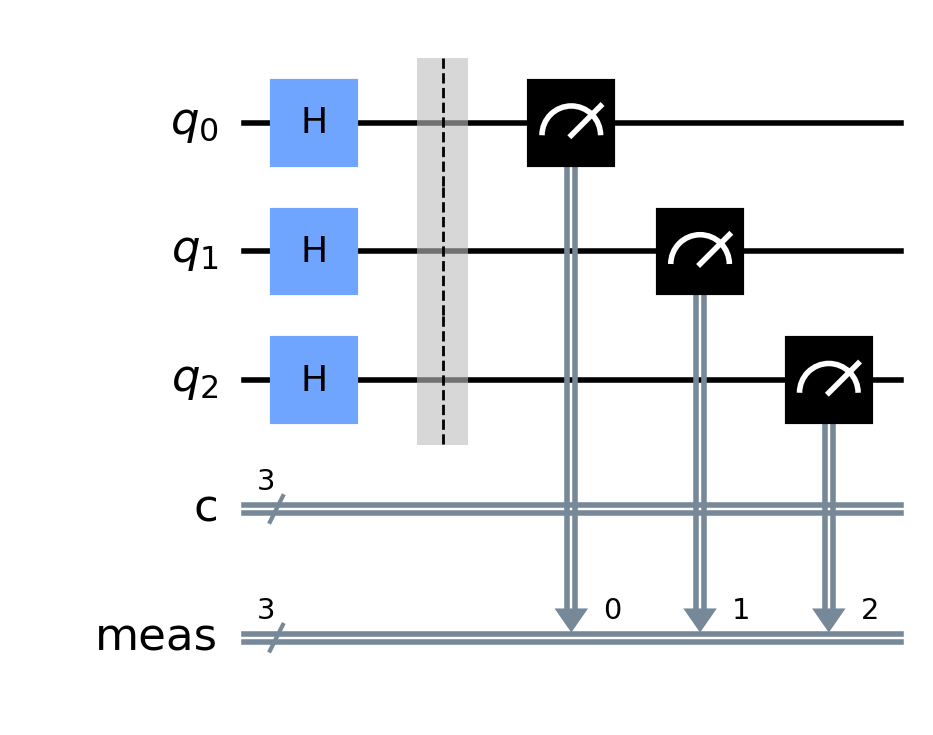

In [113]:
# Quantum circuit to select a note

nqbits = 3
qc = QuantumCircuit(nqbits,nqbits)
for i in range(0, nqbits):
  qc.h(i)
qc.measure_all()
qc.draw('mpl')

# Quantum note pitch generation function

In [120]:
backend= Aer.get_backend('qasm_simulator')

# picks a note from the given scale using the quantum circuit
def quantum_note(scale):
  job = execute(qc, backend, shots=1)
  result = job.result()
  counts = result.get_counts() # dictionary
  value_list = list(counts.keys())[0] #first entry bbb 000
  value_string = value_list[0:value_list.index(" ")] # extract bbb bits
  value = int(value_string,2) # convert binary (base 2) string to int
  #n = random.randint(0, len(scale)-1)
  #map value to range of scale
  n = int(mapRange(value, 0, (2**nqbits)-1, 0, len(scale)-1))
  note = music21.note.Note(scale[n])
  return(note)

# function to map the range of the output of the quantum circuit to the
# needed value for scale index or rhythm pattern index
def mapRange(value, inMin, inMax, outMin, outMax):
    return outMin + (((value - inMin) / (inMax - inMin)) * (outMax - outMin))

#Generate a score of quarter notes with the note values (pitches) generated by the quantum circuit


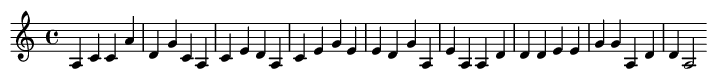

In [121]:
# create a score of quarter notes with the note values (pitches) generated by the quantum circuit
s = music21.stream.Stream()
s.append(music21.note.Note(scale[0])) #begin on root
for i in range(0,32) :
  s.append(quantum_note(scale))

#end on root
x = music21.note.Note(scale[0])
x.duration.type = 'half'
s.append(x) 

#s.show('text')
show(s)
play(s)

# Add rhythmic variations

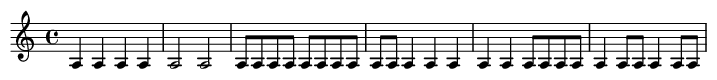

In [124]:
# some simple rythmic patterns in 4/4 time

rhythms = [
    ['quarter','quarter','quarter','quarter'],
    ['half','half'],
    ['eighth','eighth','eighth','eighth','eighth','eighth','eighth', 'eighth'],
    ['eighth','eighth','quarter','quarter','quarter'],
    ['quarter','quarter','eighth','eighth','eighth','eighth'],
    ['quarter','eighth','eighth','quarter', 'eighth','eighth']
 ]

s = music21.stream.Stream()
for i in rhythms:
  for t in i:
    x = music21.note.Note("A3", type = t)
    s.append(x) 
show(s)
play(s)

#Final Results - quantum note pitches and rhythm durations#
<a name="final-results"></a>
Add another quantum circuit to create the rhythm choices.


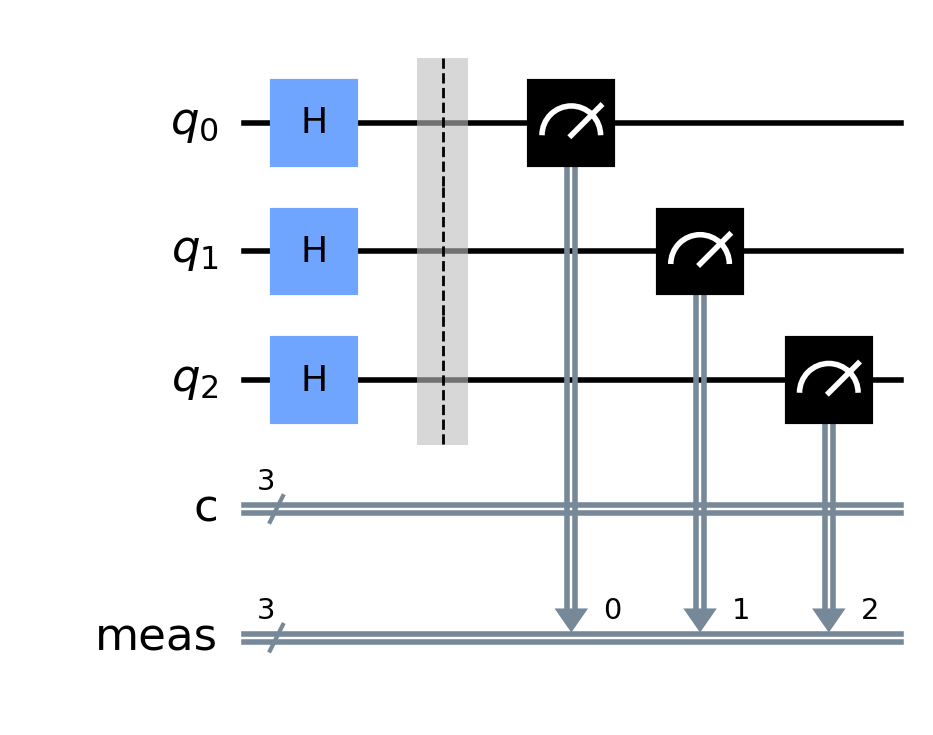

In [125]:
# Quantum circuit to select a rhythm pattern

nrqbits = 3
rqc = QuantumCircuit(nqbits,nqbits)
for i in range(0, nrqbits):
  rqc.h(i)
rqc.measure_all()
rqc.draw('mpl')

#Quantum rhythm generation function

In [118]:
  # select rhythm pattern from given set of rhythms using the rqc circuit
  def quantum_rhythm(rhythm_set):
    job = execute(rqc, backend, shots=1)
    rresult = job.result()
    rcounts = rresult.get_counts() # dictionary
    rvalue_list = list(rcounts.keys())[0] #first entry bbb 000
    rvalue_string = rvalue_list[0:rvalue_list.index(" ")] # extract bbb bits
    rvalue = int(rvalue_string,2) # convert binary (base 2) string to int
    #map value to range of scale
    r = int(mapRange(rvalue, 0, (2**nqbits)-1, 0, len(rhythm_set)-1))
    #print(rvalue,r)
    return(rhythm_set[r])

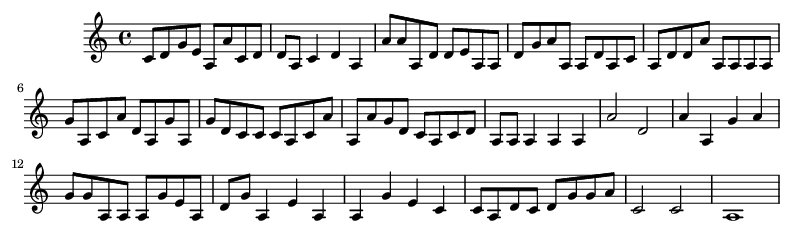

In [127]:
# generate the score

s = music21.stream.Stream()
for i in range(0,16): # measures
    # get the rhythm for this measure
    rhythm_pattern = quantum_rhythm(rhythms)
    # create all the note in this measure
    for r in rhythm_pattern:
        # get the note pitch for this note in this measure
        x = quantum_note(scale)
        x.duration.type = r
        s.append(x)

#end on the root note of the sclae
x = music21.note.Note(scale[0])
x.duration.type = 'whole'
s.append(x) 

show(s)
play(s)